## Surprise Housing 



   ###  Exploratory Data Analysis
Let's first have a look at the dataset and understand the size, attribute names etc.

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [290]:
# reading the dataset
surp = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [291]:
surp.shape, test.shape

((1168, 81), (292, 80))

surplist=surp.columns.tolist()
testlist=test.columns.tolist()
set1 = set(surplist)
set2 = set(testlist)

missing = list(sorted(set1 - set2))
missing

In [292]:
#check missing percentage
percent_missing = (surp.isnull().sum() / surp.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)


PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
LotFrontage     18.321918
GarageType       5.479452
GarageCond       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
BsmtExposure     2.654110
BsmtFinType2     2.654110
BsmtFinType1     2.568493
BsmtCond         2.568493
dtype: float64

In [293]:
# Dropping Columns with high missing values ,above 40%

surp.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
#Doing the same with test dataset
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 76), (292, 75))

In [294]:
surp[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,954.00000,1161.000000,1104.000000
mean,70.98847,102.310078,1978.193841
std,24.82875,182.595606,24.890704
min,21.00000,0.000000,1900.000000
25%,60.00000,0.000000,1961.000000
50%,70.00000,0.000000,1980.000000
75%,80.00000,160.000000,2002.000000
max,313.00000,1600.000000,2010.000000


In [295]:
 #Treating missing values by imputing for columns with missing values less than or equal to 40%

surp['LotFrontage']= surp.LotFrontage.fillna(surp.LotFrontage.median()) #Can see the presence of outliers so imputing the missing values through median
surp['MasVnrArea']= surp.MasVnrArea.fillna(surp.MasVnrArea.median())    # Can see the presence of outliers so imputing the missing values through median
surp['GarageYrBlt']= surp.GarageYrBlt.fillna(surp.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation

#Doing the same with test set
test['LotFrontage']= test.LotFrontage.fillna(test.LotFrontage.median()) 
test['MasVnrArea']= test.MasVnrArea.fillna(test.MasVnrArea.median())    
test['GarageYrBlt']= test.GarageYrBlt.fillna(test.GarageYrBlt.mean())

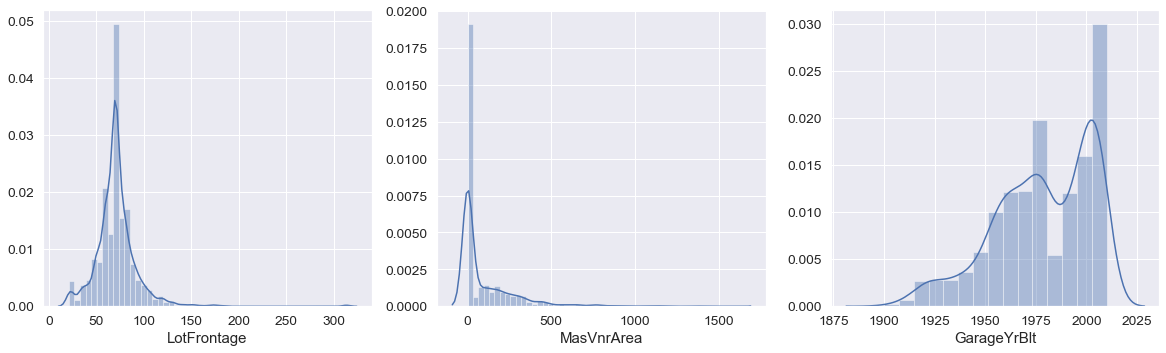

In [296]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(surp['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(surp['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(surp['GarageYrBlt'])

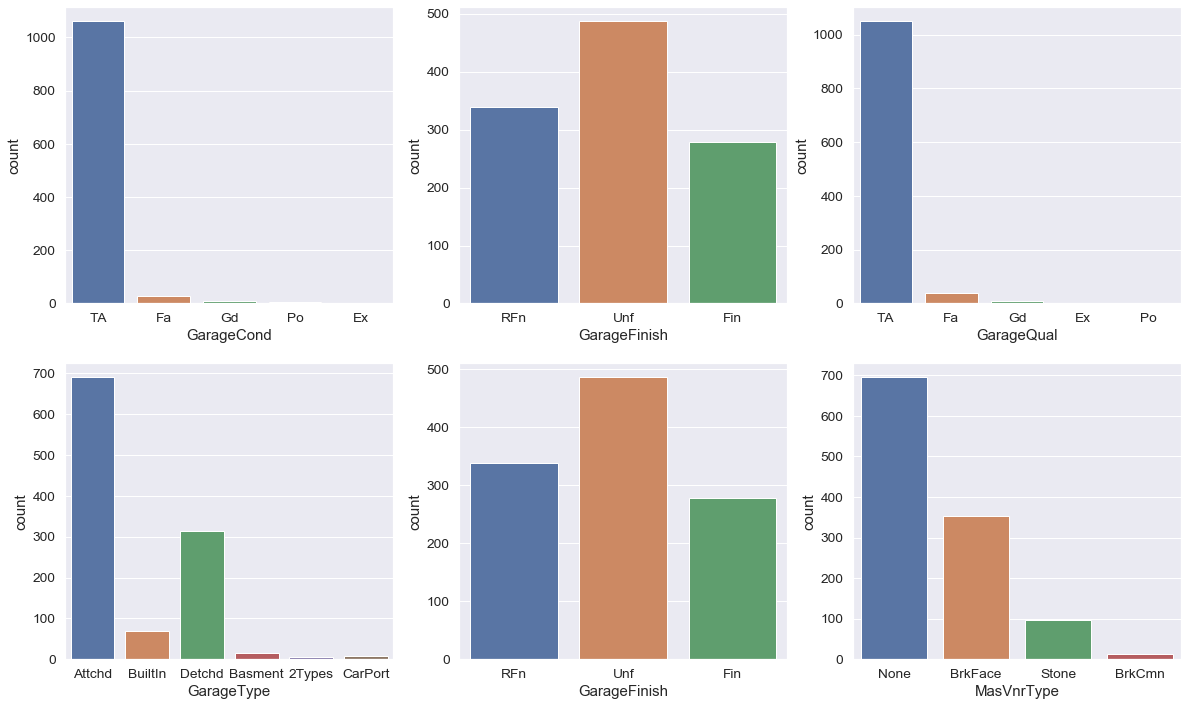

In [297]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = surp)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = surp)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = surp)
plt.show()

In [298]:

# Cases when the house doesn't have the garage so replacing null with No Garage

surp['GarageType'] = surp['GarageType'].replace(np.nan, 'No Garage')
surp['GarageFinish'] = surp['GarageFinish'].replace(np.nan, 'No Garage')
surp['GarageCond'] = surp['GarageCond'].replace(np.nan, 'No Garage')
surp['GarageQual'] = surp['GarageQual'].replace(np.nan, 'No Garage')
surp['MasVnrType'] = surp['MasVnrType'].replace(np.nan, 'None') # replacing nan with the mode of this field
surp['Electrical'] = surp['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the mode of this field

#Doing the same with test data
test['GarageType'] = test['GarageType'].replace(np.nan, 'No Garage')
test['GarageFinish'] = test['GarageFinish'].replace(np.nan, 'No Garage')
test['GarageCond'] = test['GarageCond'].replace(np.nan, 'No Garage')
test['GarageQual'] = test['GarageQual'].replace(np.nan, 'No Garage')
test['MasVnrType'] = test['MasVnrType'].replace(np.nan, 'None')
test['Electrical'] = test['Electrical'].replace(np.nan, 'SBrkr')

In [299]:
#changing num to categorical so as to form these as dummy variables 
surp['MSSubClass']=surp['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

surp['OverallQual']=surp['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
surp['OverallCond']=surp['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

#Doing the same with test dataset
#changing num to categorical so as to form these as dummy variables 
test['MSSubClass']=test['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

test['OverallQual']=test['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
test['OverallCond']=test['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})


In [300]:
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,2-STORY 1946 & NEWER,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000


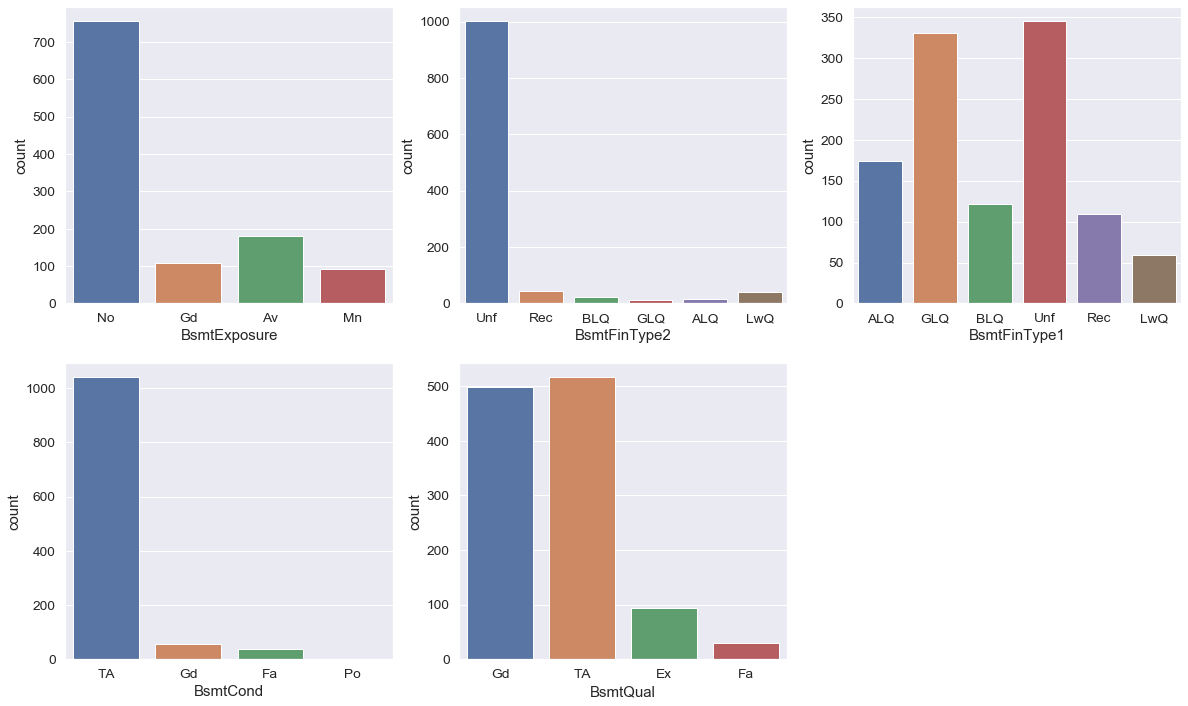

In [301]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = surp)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = surp)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = surp)

plt.show()

In [302]:
# Cases when the house doesn't have the basement so replacing null with No Basement

surp['BsmtExposure'] = surp['BsmtExposure'].replace(np.nan, 'No Basement')
surp['BsmtFinType2'] = surp['BsmtFinType2'].replace(np.nan, 'No Basement')
surp['BsmtFinType1'] = surp['BsmtFinType1'].replace(np.nan, 'No Basement')
surp['BsmtCond'] = surp['BsmtCond'].replace(np.nan, 'No Basement')
surp['BsmtQual'] = surp['BsmtQual'].replace(np.nan, 'No Basement')

#Repeating the above actions with test data
test['BsmtExposure'] = test['BsmtExposure'].replace(np.nan, 'No Basement')
test['BsmtFinType2'] = test['BsmtFinType2'].replace(np.nan, 'No Basement')
test['BsmtFinType1'] = test['BsmtFinType1'].replace(np.nan, 'No Basement')
test['BsmtCond'] = test['BsmtCond'].replace(np.nan, 'No Basement')
test['BsmtQual'] = test['BsmtQual'].replace(np.nan, 'No Basement')



In [303]:
#check missing percentage
percent_missing = (surp.isnull().sum() / surp.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)


SalePrice      0.0
ExterCond      0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
Foundation     0.0
dtype: float64

In [304]:
#check missing percentage from test set
percent_missing = (test.isnull().sum() / test.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

SaleCondition    0.0
YearBuilt        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
dtype: float64

In [305]:
#Let's check the dependent variable i.e SalePrice

#descriptive statistics summary
surp['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

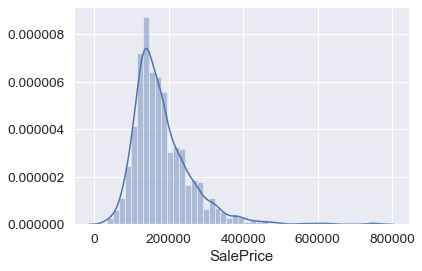

In [306]:
sns.distplot(surp['SalePrice']) #it's skewed 

In [307]:
#skewness and kurtosis
print("Skewness: %f" % surp['SalePrice'].skew())

Skewness: 1.953878


In [308]:
surp['SalePrice']=np.log(surp.SalePrice) #tranforming to form normal disribution


In [309]:
surp['SalePrice'].describe()

count    1168.000000
mean       12.028292
std         0.397423
min        10.460242
25%        11.778169
50%        12.007591
75%        12.278393
max        13.534473
Name: SalePrice, dtype: float64

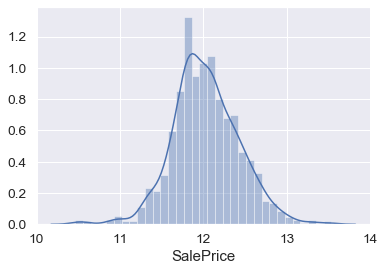

In [310]:
sns.distplot(surp['SalePrice']) # Normally distributed now

In [311]:
#skewness 
print("Skewness: %f" % surp['SalePrice'].skew())

Skewness: 0.073597


Now Dependent variable SalePrice is normally distributed.

---------------------------------------------------------------------------------------------------------------


### Let's check all the Categorical columns and their effect on price


In [312]:
Cat = surp.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [313]:
# as we have many columns so let's make groups randomly and visualize them
# we would be making two graphs to understand firstly the countplot and secondly effect of that variable on dependent variable i.e. SalePrice


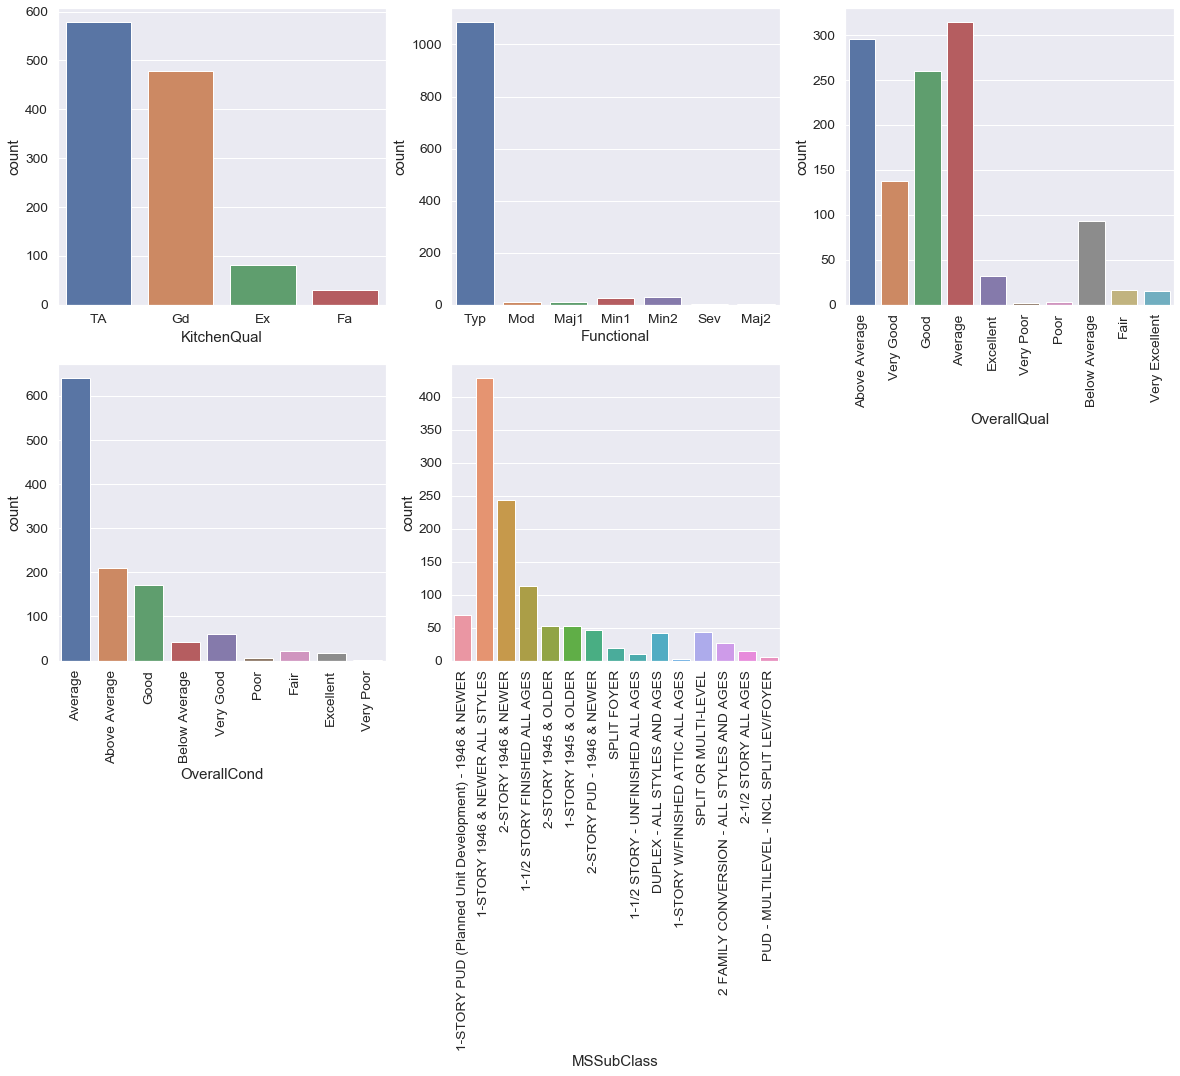

In [314]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = surp)
plt.xticks(rotation=90)


plt.show()

In [315]:
surp['MSSubClass'].value_counts() # similarly checking other columns for skewness

1-STORY 1946 & NEWER ALL STYLES                          428
2-STORY 1946 & NEWER                                     244
1-1/2 STORY FINISHED ALL AGES                            113
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     69
2-STORY 1945 & OLDER                                      53
1-STORY 1945 & OLDER                                      52
2-STORY PUD - 1946 & NEWER                                47
SPLIT OR MULTI-LEVEL                                      43
DUPLEX - ALL STYLES AND AGES                              41
2 FAMILY CONVERSION - ALL STYLES AND AGES                 26
SPLIT FOYER                                               19
2-1/2 STORY ALL AGES                                      14
1-1/2 STORY - UNFINISHED ALL AGES                         10
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                    6
1-STORY W/FINISHED ATTIC ALL AGES                          3
Name: MSSubClass, dtype: int64

In [316]:
# Dropping highly skewed column 
surp.drop(['Functional'],axis=1,inplace=True)
test.drop(['Functional'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 75), (292, 74))

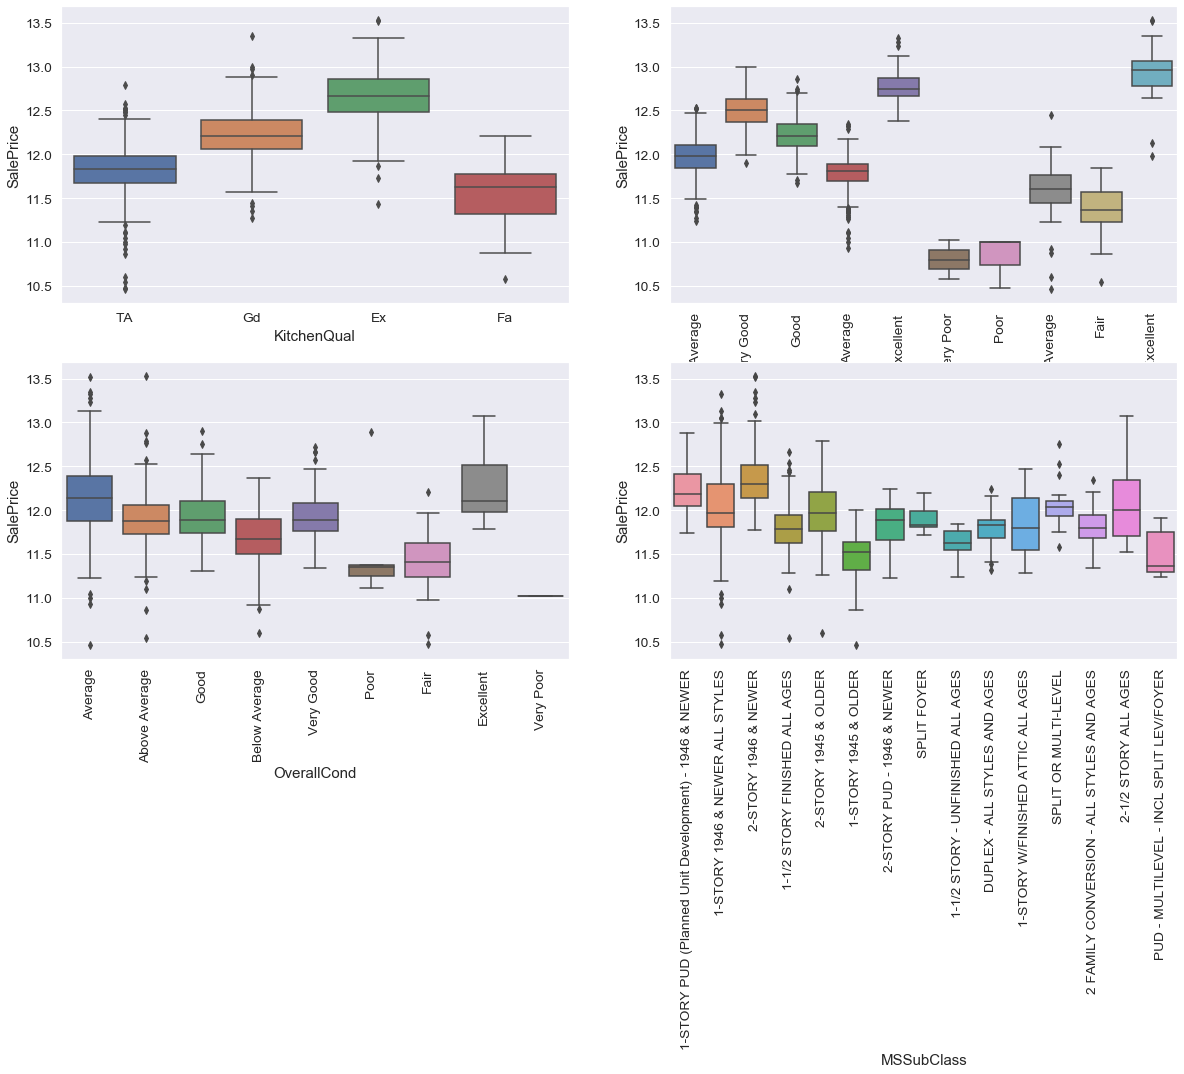

In [317]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = surp)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)

plt.show()

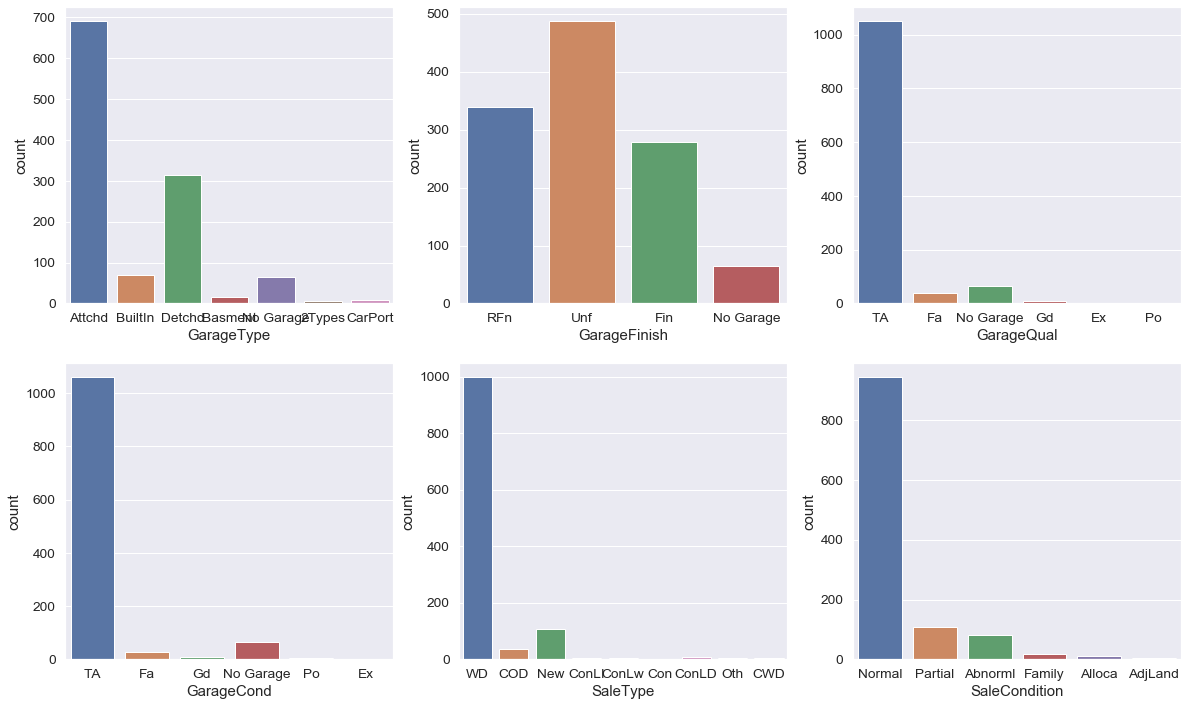

In [318]:


plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = surp)
plt.show()

In [319]:
surp['SaleCondition'].value_counts() #similarly checking other columns for skewness

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

- We can see that in this group except GarageType and Garage Finsih almost all are skewed so we can drop these columns.


In [320]:
surp['GarageType'] = surp['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
surp['SaleCondition'] = surp['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

test['GarageType'] = test['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
test['SaleCondition'] = test['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')
# Dropping highly skewed column 
surp.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)
test.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 72), (292, 71))

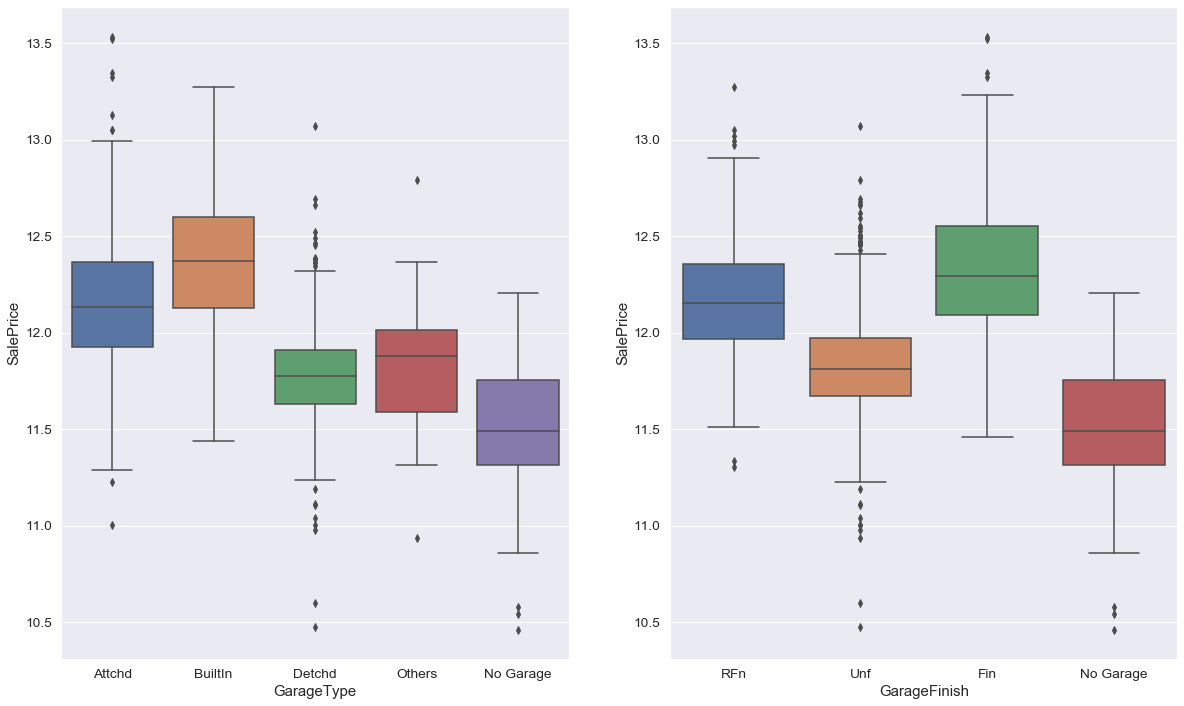

In [321]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = surp)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = surp)


- Price of Builtin Garagetype and Finished garage is the highest


............................................................................................

g7=  'Electrical', 'KitchenQual',
       'Functional'

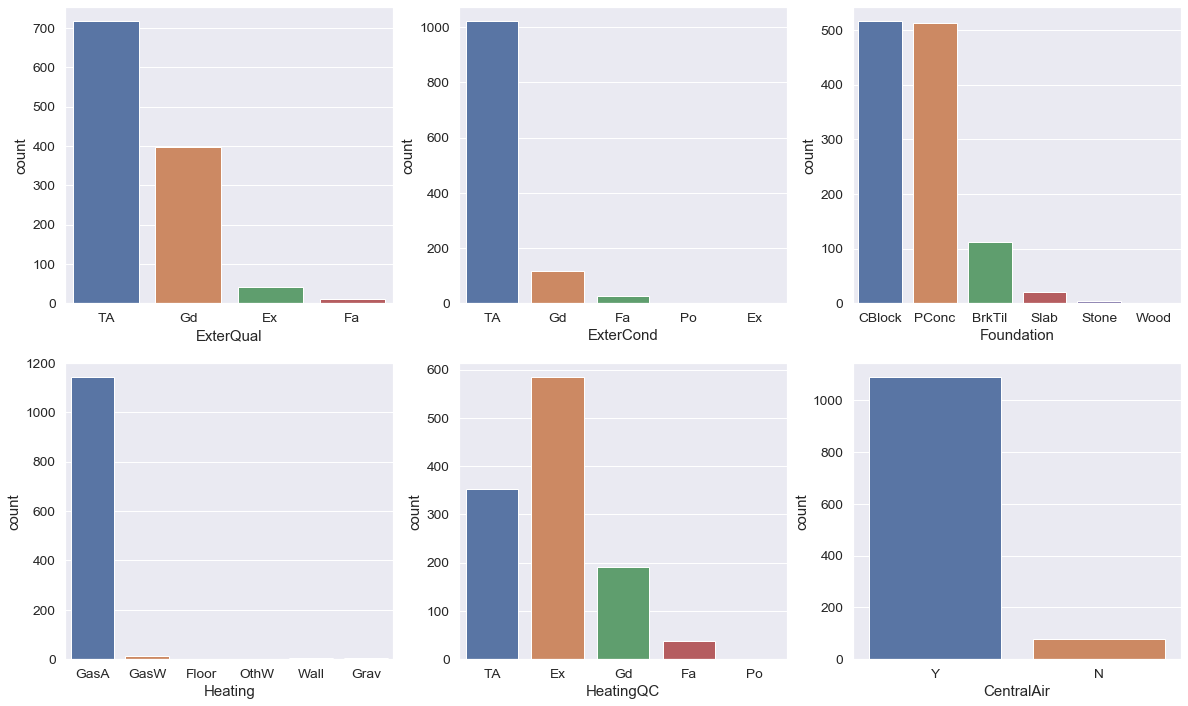

In [322]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = surp)
plt.show()

- Majority of ExterQual, ExerCond is TA
- Poured Contrete foundation are the highest in number
- Meanwhile variables like Heating , Central Airand Exter Cond are skewed so would be dropping these variables

In [323]:
surp['HeatingQC'].value_counts() # similarly checked for all variables to check the skewness

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [324]:
surp['Foundation'] = surp['Foundation'].replace(['Slab','Stone','Wood'],'Others')
test['Foundation'] = test['Foundation'].replace(['Slab','Stone','Wood'],'Others')
# Dropping highly skewed column 
surp.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)
test.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 69), (292, 68))

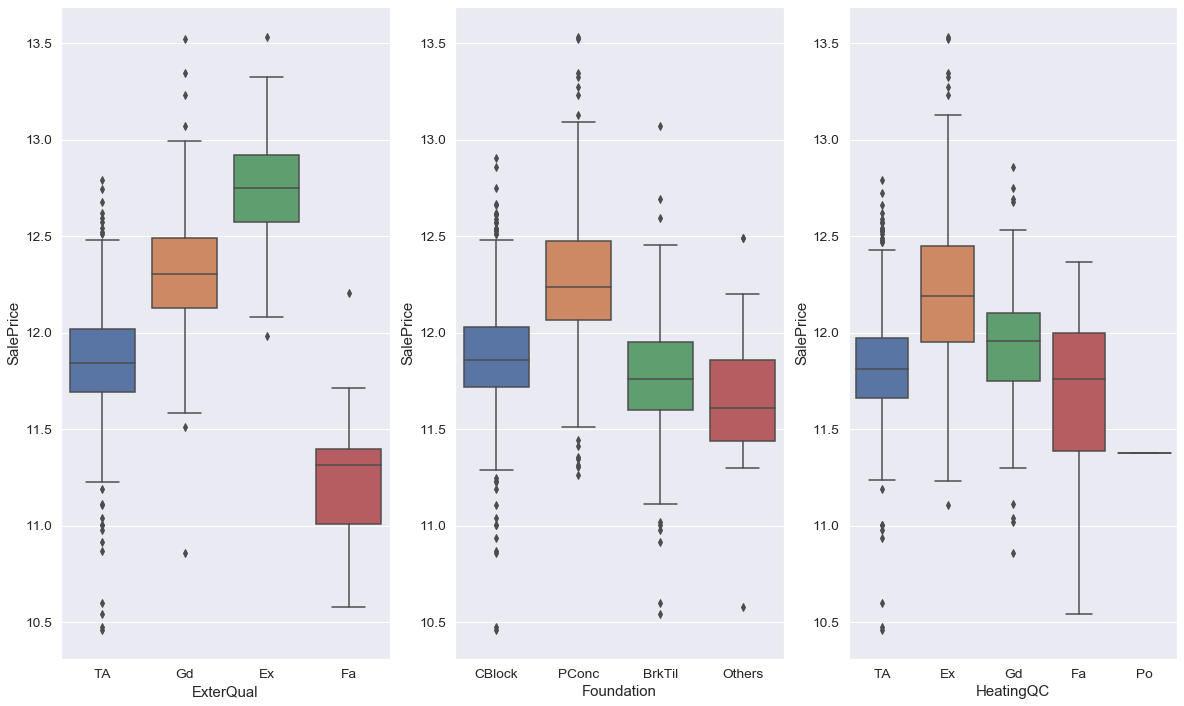

In [325]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = surp)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = surp)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = surp)

- Price of Excellent ExterQual and HeatingQc is highest
- Price of Poured Contrete Foundation is highest.

.......................................................................................

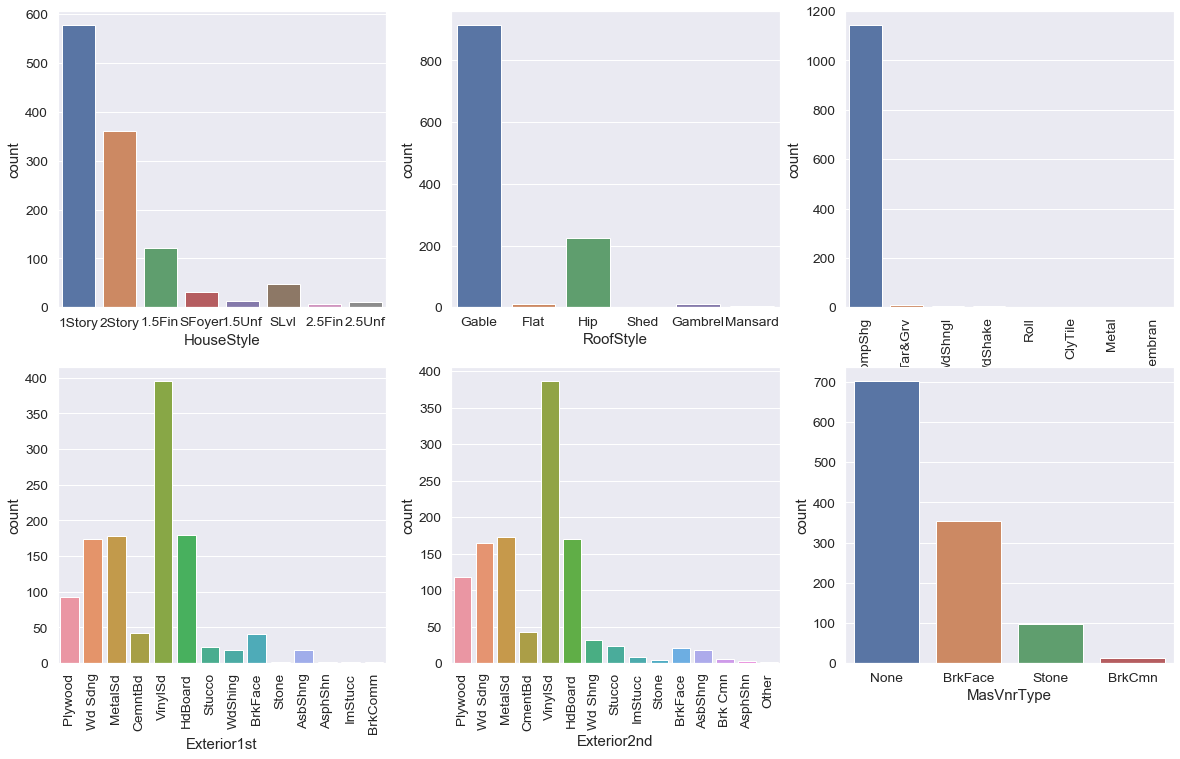

In [326]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = surp)
plt.show()

In [327]:
surp['Exterior2nd'].value_counts() #similarly checking the skewness for other columns

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

In [328]:
surp['HouseStyle'] = surp['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
surp['RoofStyle'] = surp['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
surp['Exterior1st'] = surp['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
surp['Exterior2nd'] = surp['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
#Doing the same with test set
test['HouseStyle'] = test['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
test['RoofStyle'] = test['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
test['Exterior1st'] = test['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
test['Exterior2nd'] = test['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

# Dropping highly skewed column 
surp.drop(['RoofMatl'],axis=1,inplace=True)
test.drop(['RoofMatl'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 68), (292, 67))

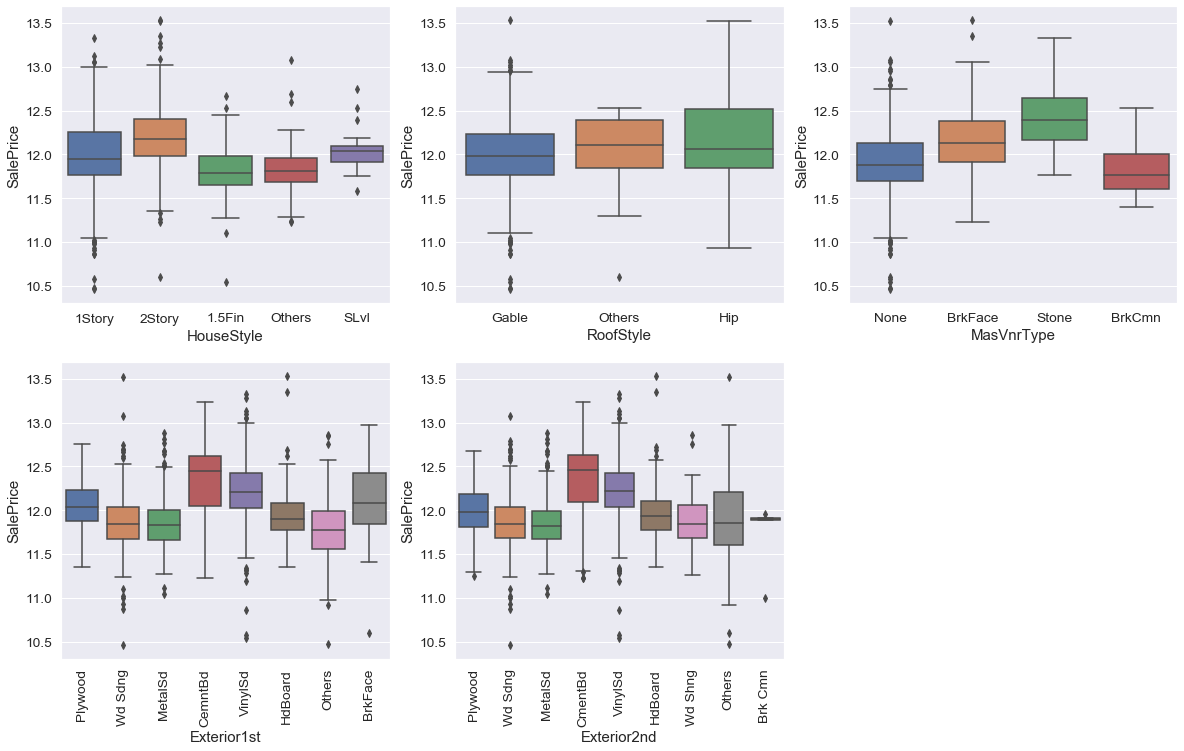

In [329]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = surp)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = surp)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = surp)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = surp)
plt.xticks(rotation=90)
plt.show()

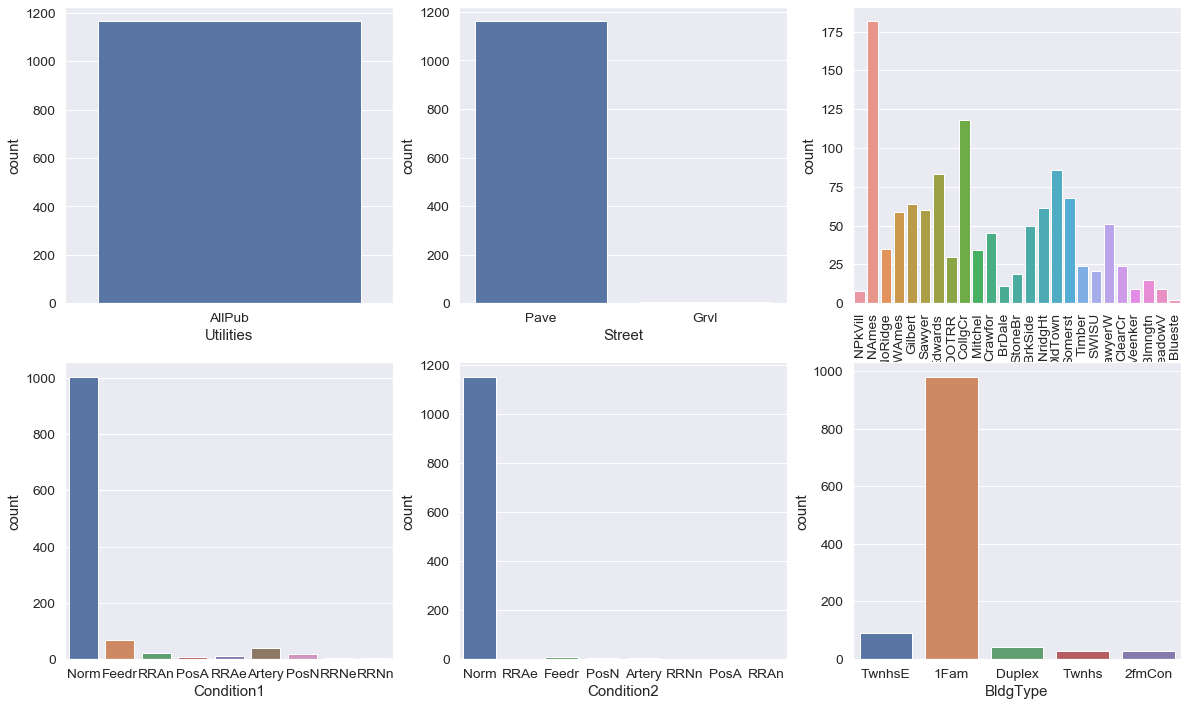

In [330]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = surp)
plt.show()

In [331]:
surp['BldgType'].value_counts()#similarly checking skewness for other columns

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [332]:
# Dropping highly skewed column 
surp.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)
test.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 64), (292, 63))

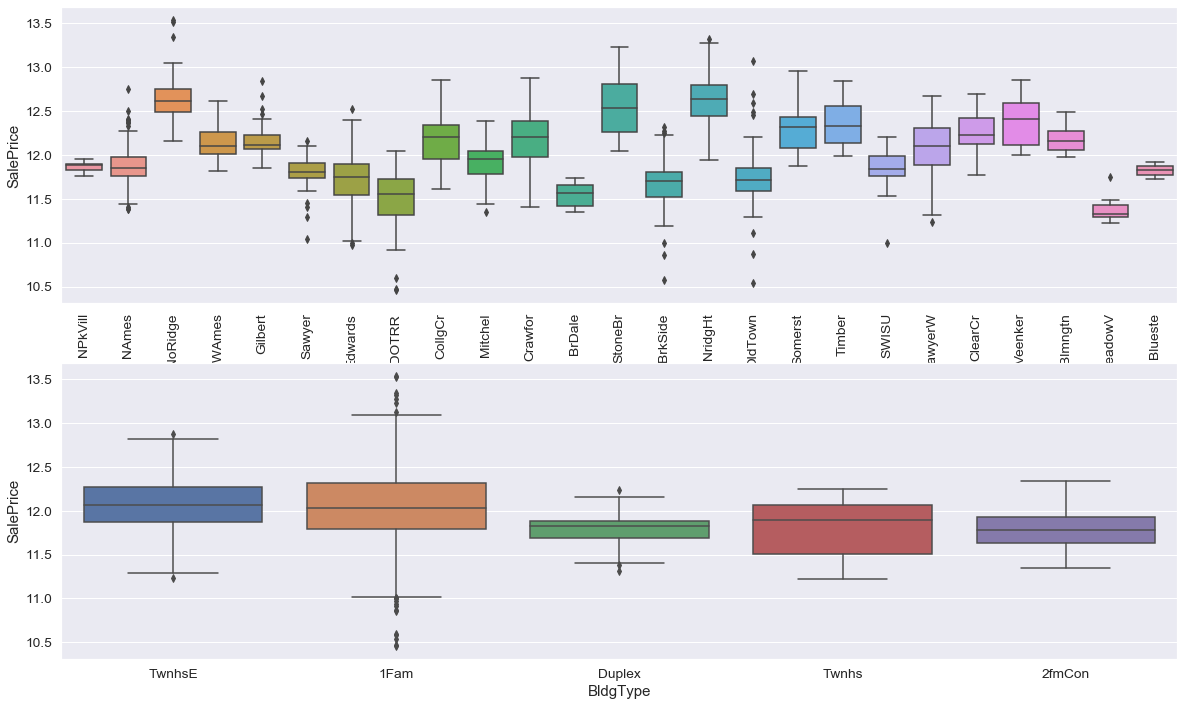

In [333]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = surp)


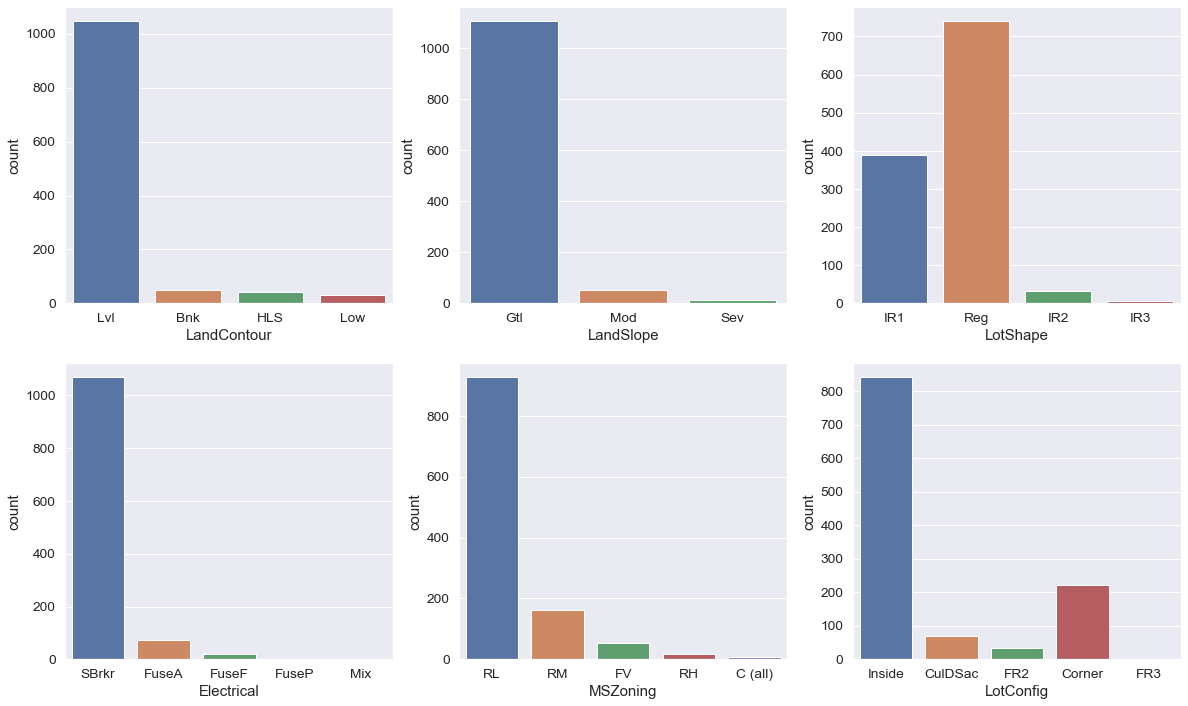

In [334]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = surp)
plt.show()

In [335]:
surp['LotConfig'].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [336]:
surp.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)
surp['MSZoning'] = surp['MSZoning'].replace(['RH','C (all)'],'Others')
#Doing the same with test set
test.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

test['MSZoning'] = test['MSZoning'].replace(['RH','C (all)'],'Others')

surp.shape, test.shape

((1168, 61), (292, 60))

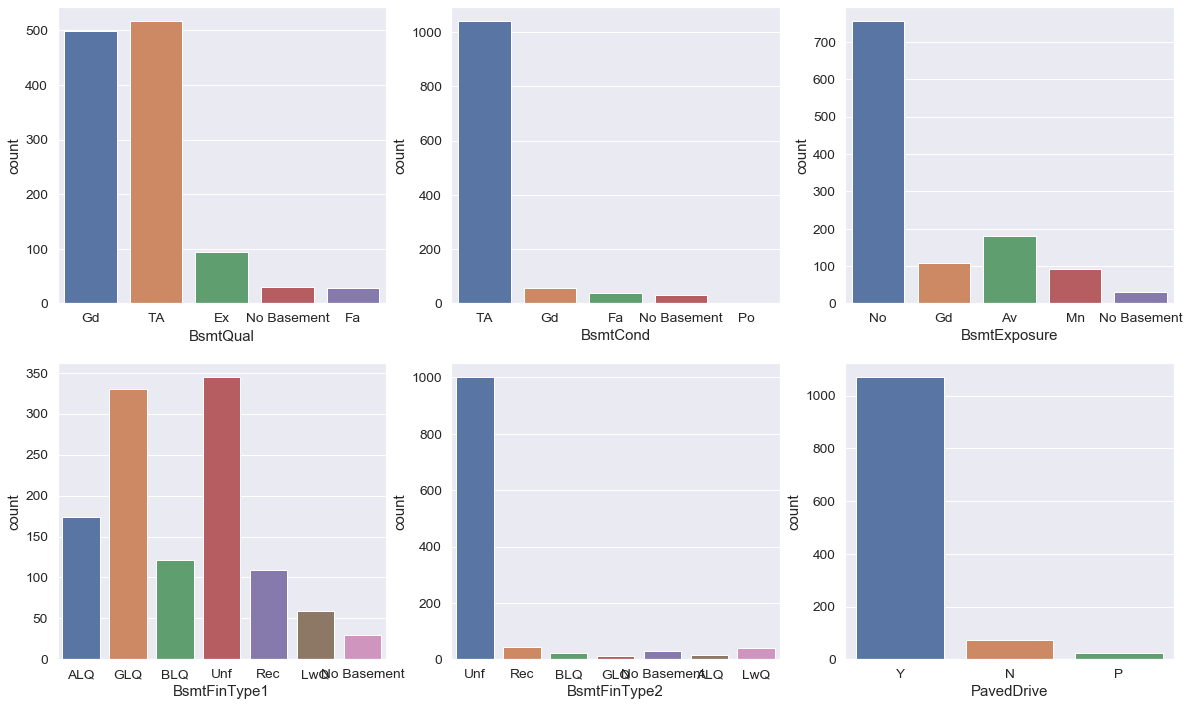

In [337]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = surp)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = surp)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = surp)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = surp)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = surp)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = surp)
plt.show()

In [338]:
surp['BsmtCond'].value_counts() # similarly checking skewness for other columns

TA             1041
Gd               56
Fa               39
No Basement      30
Po                2
Name: BsmtCond, dtype: int64

In [339]:
surp.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)
test.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)
surp.shape, test.shape

((1168, 58), (292, 57))

In [340]:
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,127,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,205,0,0,0,0,0,2,2007,Normal,11.759786
1,889,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,207,0,0,224,0,0,10,2007,Normal,12.498742
2,793,2-STORY 1946 & NEWER,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,130,0,0,0,0,0,6,2007,Normal,12.505399
3,110,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,122,0,0,0,0,0,1,2010,Normal,12.154779
4,422,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,0,0,0,0,0,0,6,2009,Normal,12.278393


In [341]:
surp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   object 
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   LotShape       1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   Neighborhood   1168 non-null   object 
 8   BldgType       1168 non-null   object 
 9   HouseStyle     1168 non-null   object 
 10  OverallQual    1168 non-null   object 
 11  OverallCond    1168 non-null   object 
 12  YearBuilt      1168 non-null   int64  
 13  YearRemodAdd   1168 non-null   int64  
 14  RoofStyle      1168 non-null   object 
 15  Exterior1st    1168 non-null   object 
 16  Exterior2nd    1168 non-null   object 
 17  MasVnrType     1168 non-null   object 
 18  MasVnrAr

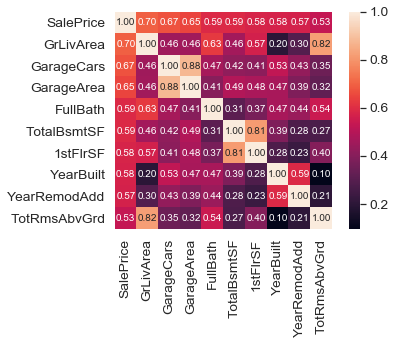

In [342]:
#saleprice correlation matrix
corrmat = surp.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(surp[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [343]:
surp['YearSinceRemodel'] = 2010 - ((surp['YearRemodAdd'] - surp['YearBuilt']) + surp['YearBuilt']) 
test['YearSinceRemodel'] = 2010 - ((test['YearRemodAdd'] - test['YearBuilt']) + test['YearBuilt']) 
surp.shape, test.shape

((1168, 59), (292, 58))

In [344]:
Cat1 = surp.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [345]:
Cat2 = test.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat2.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [346]:
Num1 = surp.select_dtypes(include=['int64','float64']) #all numerical variables
Num1.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [347]:
Num2 = test.select_dtypes(include=['int64','float64']) #all numerical variables
Num2.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'YearSinceRemodel'],
      dtype='object')

In [348]:
Num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1168 non-null   int64  
 1   LotFrontage       1168 non-null   float64
 2   LotArea           1168 non-null   int64  
 3   YearBuilt         1168 non-null   int64  
 4   YearRemodAdd      1168 non-null   int64  
 5   MasVnrArea        1168 non-null   float64
 6   BsmtFinSF1        1168 non-null   int64  
 7   BsmtFinSF2        1168 non-null   int64  
 8   BsmtUnfSF         1168 non-null   int64  
 9   TotalBsmtSF       1168 non-null   int64  
 10  1stFlrSF          1168 non-null   int64  
 11  2ndFlrSF          1168 non-null   int64  
 12  LowQualFinSF      1168 non-null   int64  
 13  GrLivArea         1168 non-null   int64  
 14  BsmtFullBath      1168 non-null   int64  
 15  BsmtHalfBath      1168 non-null   int64  
 16  FullBath          1168 non-null   int64  


In [349]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1168, 130)


In [350]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [351]:
Cat2 = pd.get_dummies(Cat2,drop_first=True)  # Dummy variables
print(Cat2.shape)

(292, 124)


Here, we have the shape mismatch in cat1 and cat2. This is because there are a few categories which are not present in the test dataset. We need to first detect those missing columns and then create dummy columns in the test dataset

In [352]:
surplist=Cat1.columns.tolist()
testlist=Cat2.columns.tolist()
set1 = set(surplist)
set2 = set(testlist)

missing = list(sorted(set1 - set2))
missing

['HeatingQC_Po',
 'Neighborhood_Blueste',
 'OverallCond_Poor',
 'OverallCond_Very Poor',
 'OverallQual_Poor',
 'OverallQual_Very Poor']

In [353]:
#Adding the empty missing columns to test set
c = ['HeatingQC_Po', 'Neighborhood_Blueste', 'OverallCond_Poor','OverallCond_Very Poor','OverallQual_Poor','OverallQual_Very Poor']
Cat2=Cat2.assign(**dict.fromkeys(c, 0))

In [354]:
Cat2['HeatingQC_Po', 'Neighborhood_Blueste', 'OverallCond_Poor','OverallCond_Very Poor','OverallQual_Poor','OverallQual_Very Poor']=0
Cat2['HeatingQC_Po', 'Neighborhood_Blueste', 'OverallCond_Poor','OverallCond_Very Poor','OverallQual_Poor','OverallQual_Very Poor'] = Cat2['HeatingQC_Po', 'Neighborhood_Blueste', 'OverallCond_Poor','OverallCond_Very Poor','OverallQual_Poor','OverallQual_Very Poor'].apply(pd.to_numeric) 

In [355]:
list(Cat2.dtypes[Cat2.dtypes =='object'].index)


[]

In [356]:
# concat dummy variables with main dataset
surp = pd.concat([surp, Cat1], axis=1) 
test = pd.concat([test, Cat2], axis=1) 
surp.shape, test.shape

((1168, 189), (292, 189))

In [357]:
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,127,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928,IR1,Inside,NPkVill,TwnhsE,1Story,...,0,0,0,0,0,1,0,1,0,0
1,889,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865,IR1,Inside,NAmes,1Fam,1Story,...,0,0,0,0,0,0,1,1,0,0
2,793,2-STORY 1946 & NEWER,RL,92.0,9920,IR1,CulDSac,NoRidge,1Fam,2Story,...,0,0,0,0,0,0,1,1,0,0
3,110,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751,IR1,Inside,NWAmes,1Fam,1Story,...,0,0,0,0,0,1,0,1,0,0
4,422,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635,IR1,FR2,NWAmes,1Fam,1Story,...,0,0,0,0,0,0,0,1,0,0


In [358]:
#removing columns as dummy variables already formed
surp.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) 

In [359]:
#Doing the same with test set
test.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) 

In [360]:
surp.shape,test.shape

((1168, 165), (292, 165))

In [361]:
surp.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,70.0,4928,1976,1976,0.0,120,0,958,1078,958,...,0,0,0,0,0,1,0,1,0,0
1,95.0,15865,1970,1970,0.0,351,823,1043,2217,2217,...,0,0,0,0,0,0,1,1,0,0
2,92.0,9920,1996,1997,0.0,862,0,255,1117,1127,...,0,0,0,0,0,0,1,1,0,0
3,105.0,11751,1977,1977,480.0,705,0,1139,1844,1844,...,0,0,0,0,0,1,0,1,0,0
4,70.0,16635,1977,2000,126.0,1246,0,356,1602,1602,...,0,0,0,0,0,0,0,1,0,0


In [362]:
surp.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model
test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) 

In [363]:
surp.shape,test.shape

((1168, 161), (292, 161))

In [364]:
# Putting feature variable to X
X = surp.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,70.0,4928,0.0,120,0,958,1078,958,0,0,...,0,0,0,0,0,1,0,1,0,0
1,95.0,15865,0.0,351,823,1043,2217,2217,0,0,...,0,0,0,0,0,0,1,1,0,0
2,92.0,9920,0.0,862,0,255,1117,1127,886,0,...,0,0,0,0,0,0,1,1,0,0
3,105.0,11751,480.0,705,0,1139,1844,1844,0,0,...,0,0,0,0,0,1,0,1,0,0
4,70.0,16635,126.0,1246,0,356,1602,1602,0,0,...,0,0,0,0,0,0,0,1,0,0


In [365]:
X.shape, test.shape

((1168, 160), (292, 161))

In [366]:
##checking if there are any categorical variables
list(surp.dtypes[surp.dtypes =='object'].index)

[]

In [367]:
##checking if there are any categorical variables in test set
list(test.dtypes[test.dtypes =='object'].index)

[]

In [368]:
# Putting response variable to y
y = surp['SalePrice']

y.head()

0    11.759786
1    12.498742
2    12.505399
3    12.154779
4    12.278393
Name: SalePrice, dtype: float64

In [369]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [370]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
227,-0.749375,-0.580759,-0.564640,-0.994911,-0.278136,0.637750,-0.442216,-0.753512,-0.776351,-0.121615,...,0,0,1,0,1,0,0,1,0,0
247,-2.285923,-0.929805,-0.564640,-0.994911,-0.278136,0.033907,-1.099249,-1.679883,0.633001,1.504893,...,0,1,0,0,0,1,0,1,0,0
811,-0.005885,-0.238089,-0.564640,-0.533544,-0.278136,0.706271,0.112300,-0.144462,-0.776351,-0.121615,...,0,0,1,0,1,0,0,0,0,1
1097,-0.303281,-0.192156,-0.564640,0.131632,-0.278136,-0.477861,-0.484155,-0.799575,1.178192,-0.121615,...,0,0,0,0,0,1,0,1,0,0
91,-0.005885,-0.139138,1.593232,-0.994911,-0.278136,1.008193,-0.039143,-0.310799,1.956389,-0.121615,...,1,0,0,0,0,0,0,1,0,0


In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

## 3. Model Building and Evaluation
- Ridge and Lasso Regression

### Ridge


In [372]:
# list of alphas to tune
list_alpha = [0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [373]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048474,0.087974,0.001196,0.000399,0.1,{'alpha': 0.1},-0.115330,-0.097267,-0.102182,-0.117761,...,-0.108018,0.007723,6,-0.072571,-0.083492,-0.083137,-0.079147,-0.086061,-0.080882,0.004708
1,0.004189,0.001163,0.001596,0.000798,0.5,{'alpha': 0.5},-0.114327,-0.096579,-0.100960,-0.116035,...,-0.106675,0.007513,4,-0.072718,-0.083686,-0.083267,-0.079378,-0.086290,-0.081068,0.004723
2,0.003990,0.000893,0.001196,0.000398,1,{'alpha': 1.0},-0.113507,-0.096468,-0.100046,-0.114795,...,-0.105742,0.007268,3,-0.072860,-0.083781,-0.083338,-0.079593,-0.086430,-0.081200,0.004706
3,0.003191,0.000398,0.001197,0.000399,5,{'alpha': 5.0},-0.110941,-0.097371,-0.096611,-0.111730,...,-0.102946,0.006870,1,-0.073724,-0.084788,-0.084675,-0.081206,-0.088101,-0.082499,0.004900
4,0.003991,0.000891,0.001395,0.000487,20,{'alpha': 20},-0.113283,-0.101734,-0.097494,-0.112738,...,-0.104339,0.007300,2,-0.079332,-0.090133,-0.090917,-0.086812,-0.093512,-0.088141,0.004897


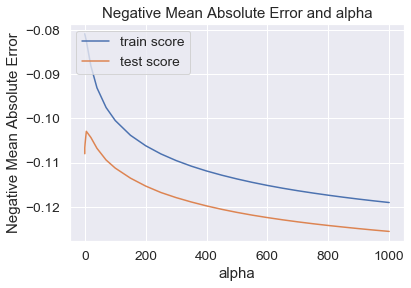

In [374]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [375]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 5.0}

In [376]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.68002922e-04,  4.74899643e-07,  1.99536474e-05, -2.48636539e-05,
        1.75142415e-07,  3.70674898e-06, -2.09817587e-05,  4.36549371e-05,
        4.15916658e-05,  6.70859913e-05,  1.52332602e-04,  4.46043502e-02,
        1.16972387e-02,  5.92835505e-02,  4.79769783e-02,  1.27122134e-02,
       -7.15722414e-02,  1.66666698e-02,  2.62961749e-02,  4.49489701e-02,
        1.02359173e-04,  1.46340357e-04, -6.99556193e-05,  2.53956975e-05,
        1.27720803e-04,  2.32677371e-04, -2.08182413e-05, -4.68001423e-06,
        1.00017106e-03, -1.05843791e-03,  1.98661719e-02, -6.52619490e-02,
        4.98539748e-02, -5.55179257e-03, -6.18100069e-03,  1.32903415e-02,
        1.84495297e-02,  1.95657959e-02, -1.08378361e-02, -7.11777427e-02,
        1.42648786e-02, -2.66778686e-02,  2.86989759e-02,  1.34435616e-02,
       -9.70366454e-02,  7.09274200e-06, -3.49824750e-02,  3.14573881e-02,
       -6.90205070e-02,  1.33290645e-02,  6.44132354e-02, -3.77264457e-02,
       -2.29472512e-02,  

In [377]:
ridge.score(X_train,y_train)

0.9077474927925651

In [378]:
ridge.score(X_test,y_test)

0.8531385463093484

In [379]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.511),
 ('LotFrontage', -0.166),
 ('LotArea', -0.145),
 ('MasVnrArea', -0.106),
 ('BsmtFinSF1', -0.104),
 ('BsmtFinSF2', -0.101),
 ('BsmtUnfSF', -0.097),
 ('TotalBsmtSF', -0.08),
 ('1stFlrSF', -0.08),
 ('2ndFlrSF', -0.08),
 ('LowQualFinSF', -0.077),
 ('GrLivArea', -0.074),
 ('BsmtFullBath', -0.072),
 ('BsmtHalfBath', -0.071),
 ('FullBath', -0.071),
 ('HalfBath', -0.069),
 ('BedroomAbvGr', -0.069),
 ('KitchenAbvGr', -0.069),
 ('TotRmsAbvGrd', -0.069),
 ('Fireplaces', -0.068),
 ('GarageCars', -0.065),
 ('GarageArea', -0.06),
 ('WoodDeckSF', -0.058),
 ('OpenPorchSF', -0.056),
 ('EnclosedPorch', -0.056),
 ('3SsnPorch', -0.054),
 ('ScreenPorch', -0.054),
 ('PoolArea', -0.052),
 ('MiscVal', -0.051),
 ('MoSold', -0.048),
 ('YearSinceRemodel', -0.046),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.046),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.045),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.04),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

In [380]:
test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial,HeatingQC_Po,Neighborhood_Blueste,OverallCond_Poor,OverallCond_Very Poor,OverallQual_Poor,OverallQual_Very Poor,"(HeatingQC_Po, Neighborhood_Blueste, OverallCond_Poor, OverallCond_Very Poor, OverallQual_Poor, OverallQual_Very Poor)"
0,86.0,14157,200.0,1249,0,673,1922,1922,0,0,...,1,0,0,0,0,0,0,0,0,0
1,65.0,5814,0.0,1036,0,184,1220,1360,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,11838,0.0,0,0,1753,1753,1788,0,0,...,1,0,0,0,0,0,0,0,0,0
3,75.0,12000,0.0,275,0,429,704,860,704,0,...,1,0,0,0,0,0,0,0,0,0
4,86.0,14598,74.0,0,0,894,894,894,1039,0,...,1,0,0,0,0,0,0,0,0,0


In [381]:
#prediction = ridge.predict(test)

## Lasso

In [382]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [383]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029321,0.042217,0.001197,3.991367e-04,0.1,{'alpha': 0.1},-0.151398,-0.129022,-0.129812,-0.139037,...,-0.136052,0.008466,1,-0.118080,-0.135141,-0.134753,-0.129575,-0.136160,-0.130742,0.006730
1,0.012366,0.002148,0.001596,4.888506e-04,0.5,{'alpha': 0.5},-0.151865,-0.132464,-0.129468,-0.140660,...,-0.136619,0.008728,2,-0.119734,-0.135462,-0.134604,-0.129691,-0.136180,-0.131134,0.006137
2,0.010171,0.000747,0.001197,3.983026e-04,1,{'alpha': 1.0},-0.157166,-0.141848,-0.132401,-0.146241,...,-0.141842,0.009478,3,-0.125462,-0.140824,-0.139290,-0.135080,-0.141325,-0.136396,0.005892
3,0.004588,0.000798,0.000997,1.907349e-07,5,{'alpha': 5.0},-0.175894,-0.164963,-0.152213,-0.170032,...,-0.162214,0.010572,4,-0.150244,-0.160532,-0.163664,-0.158039,-0.164138,-0.159323,0.005051
4,0.014760,0.022545,0.000997,6.303742e-04,20,{'alpha': 20},-0.205357,-0.179051,-0.163908,-0.196321,...,-0.181243,0.017326,5,-0.170466,-0.178899,-0.183809,-0.175809,-0.183820,-0.178561,0.005068


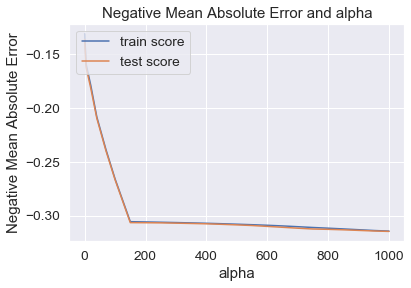

In [384]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [385]:
# Checking best parameter (alpha)

model_cv.best_params_

{'alpha': 0.1}

In [386]:
alpha = 0.1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [387]:
lasso.score(X_train,y_train)

0.7566065016034313

In [388]:
lasso.score(X_test,y_test)

0.7128329951794776

In [389]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.323),
 ('LotFrontage', -0.005),
 ('LotArea', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageCars', -0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YearSinceRemodel', -0.0),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.0),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.0),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 0.0),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', -0.0),
 ('MSSubClass_2

In [390]:
#prediction = lasso.predict(test)